# Customer Segmentation

### Reading Data

In [241]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as silhouette_score
import seaborn as sns

customer_metrics = pd.read_csv('../data/processed/customer_metrics_without_outliers.csv')

In [242]:
customer_metrics

,Customer ID,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency
0,12346.0,169.36,2,2010-03-02 13:08:00,2010-06-28 13:53:00,118,164
1,12347.0,1323.32,2,2010-10-31 14:20:00,2010-12-07 14:57:00,37,2
2,12348.0,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,1,73
3,12349.0,2221.14,2,2010-04-29 13:20:00,2010-10-28 08:23:00,181,42
4,12351.0,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,1,10
...,...,...,...,...,...,...,...
3804,18283.0,641.77,6,2010-02-19 17:16:00,2010-11-22 15:30:00,275,17
3805,18284.0,411.68,1,2010-10-04 11:33:00,2010-10-04 11:33:00,1,66
3806,18285.0,377.00,1,2010-02-17 10:24:00,2010-02-17 10:24:00,1,295
3807,18286.0,1246.43,2,2009-12-16 10:45:00,2010-08-20 11:57:00,247,111


### Scaling Features

In [243]:
segmentation_features = ['TotalSpent', 'Frequency', 'Recency']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_metrics[segmentation_features]) # numpy array with standard deviation

scaled_features_df = pd.DataFrame(scaled_features, index=customer_metrics.index, \
                                  columns=('TotalSpent', 'Frequency', 'Recency'))


In [244]:
scaled_features

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

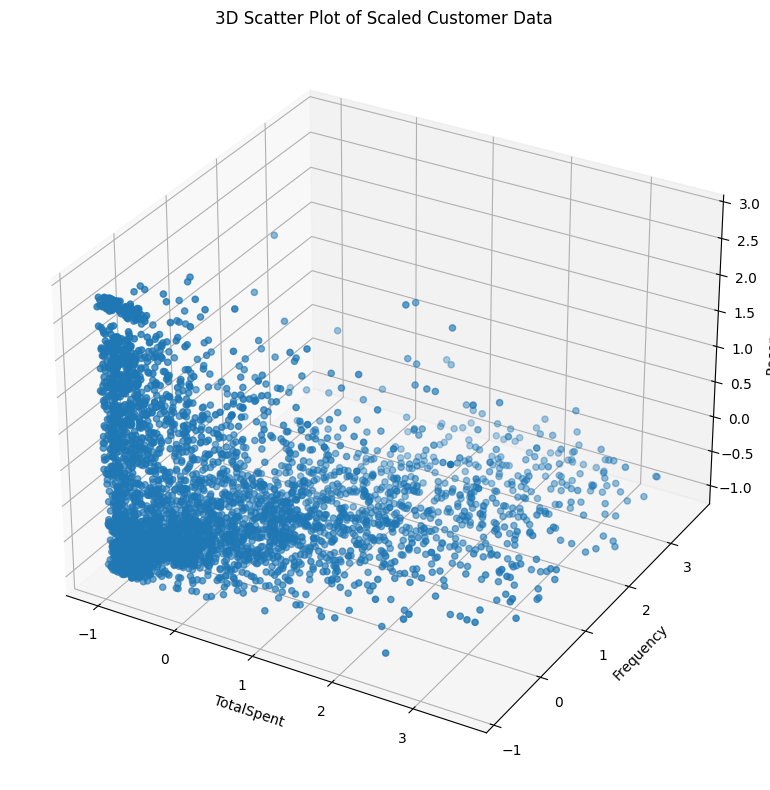

In [245]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
ax.scatter(
  scaled_features_df['TotalSpent'],
  scaled_features_df['Frequency'],
  scaled_features_df['Recency']
)
ax.set_xlabel('TotalSpent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Scaled Customer Data')

plt.tight_layout()
plt.show()

### Finding out Optimal Clusters

In [246]:
inertias = []
silhouette_scores = [] #-1 - 1 score to determine cluster overlapping (high means less overlap)
k_values = range(2, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, n_init='auto')
  cluster_labels = kmeans.fit_predict(scaled_features_df)
  sil_score = silhouette_score.silhouette_score(scaled_features_df, cluster_labels)
  silhouette_scores.append(sil_score)
  inertias.append(kmeans.inertia_)

scaled_features_df

,TotalSpent,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
3804,-0.298120,1.398076,-0.816344
3805,-0.579553,-0.830631,-0.316846
3806,-0.621972,-0.830631,2.017539
3807,0.441467,-0.384889,0.141876


### Plotting Elbow Curve

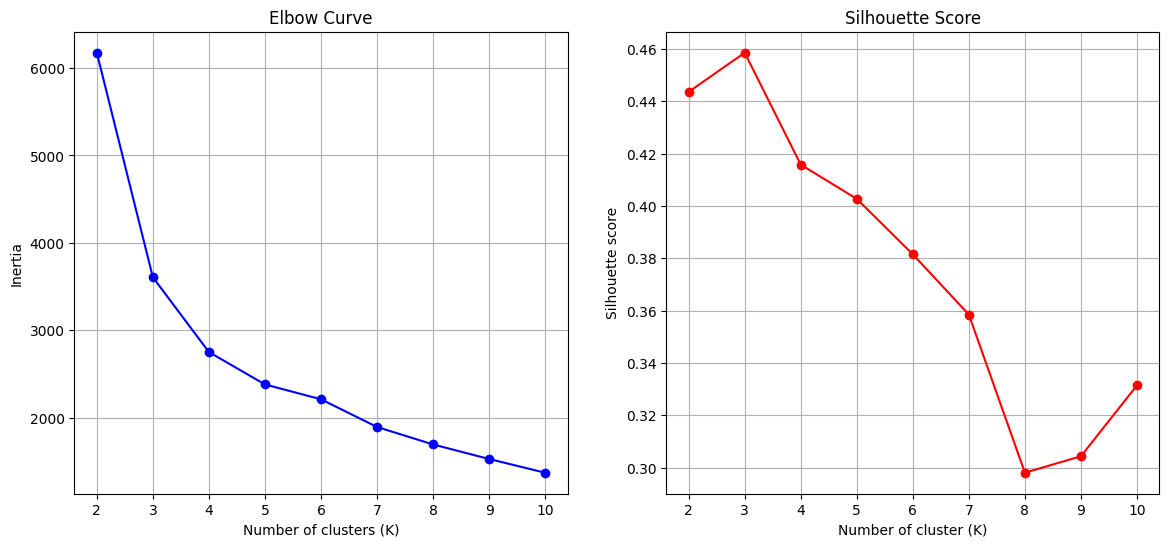

In [247]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.title('Elbow Curve')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of cluster (K)')
plt.ylabel('Silhouette score')
plt.grid(True)

plt.title('Silhouette Score')
plt.show()

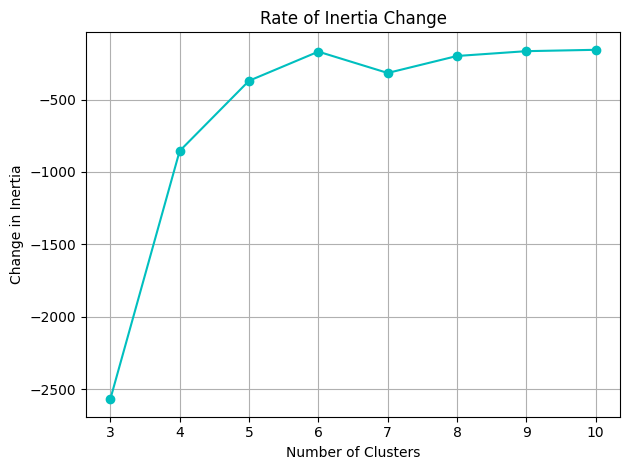

In [248]:
inertia_changes = np.diff(inertias)
plt.plot(k_values[1:], inertia_changes, 'co-')
plt.xlabel('Number of Clusters')
plt.ylabel('Change in Inertia')
plt.title('Rate of Inertia Change')
plt.tight_layout()
plt.grid(True)
plt.show()

### Segmenting Customers

In [249]:
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=42)
customer_metrics['Segment'] = kmeans_4.fit_predict(scaled_features)

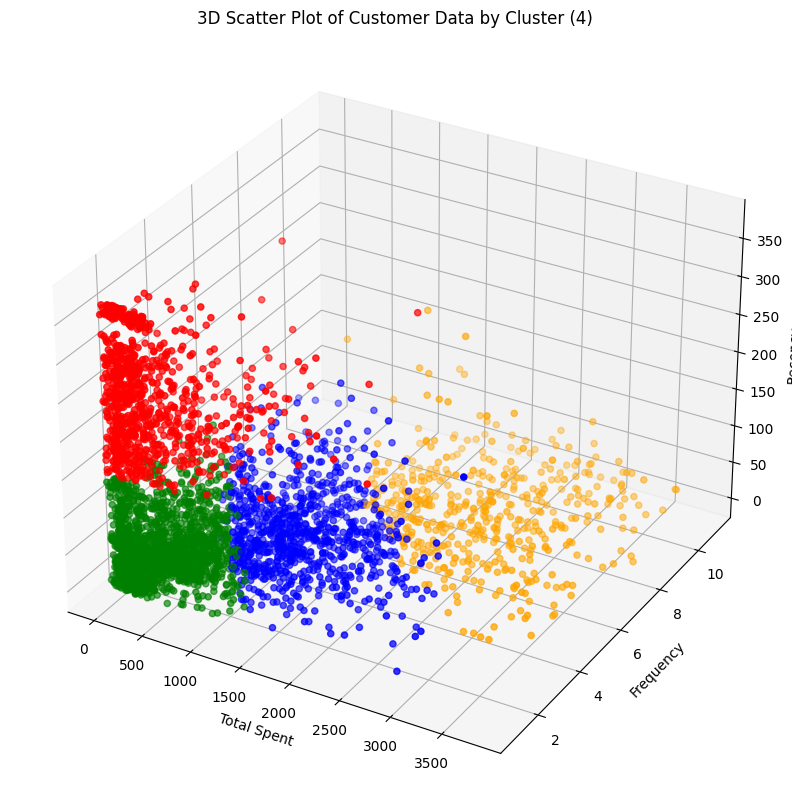

In [250]:
cluster_colors = {
  0: 'blue',
  1: 'orange',
  2: 'green',
  3: 'red'
}

colors = customer_metrics['Segment'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(customer_metrics['TotalSpent'],
                     customer_metrics['Frequency'],
                     customer_metrics['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Total Spent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster (4)')
plt.show()

### Visualizing Segment Spread in RFM 

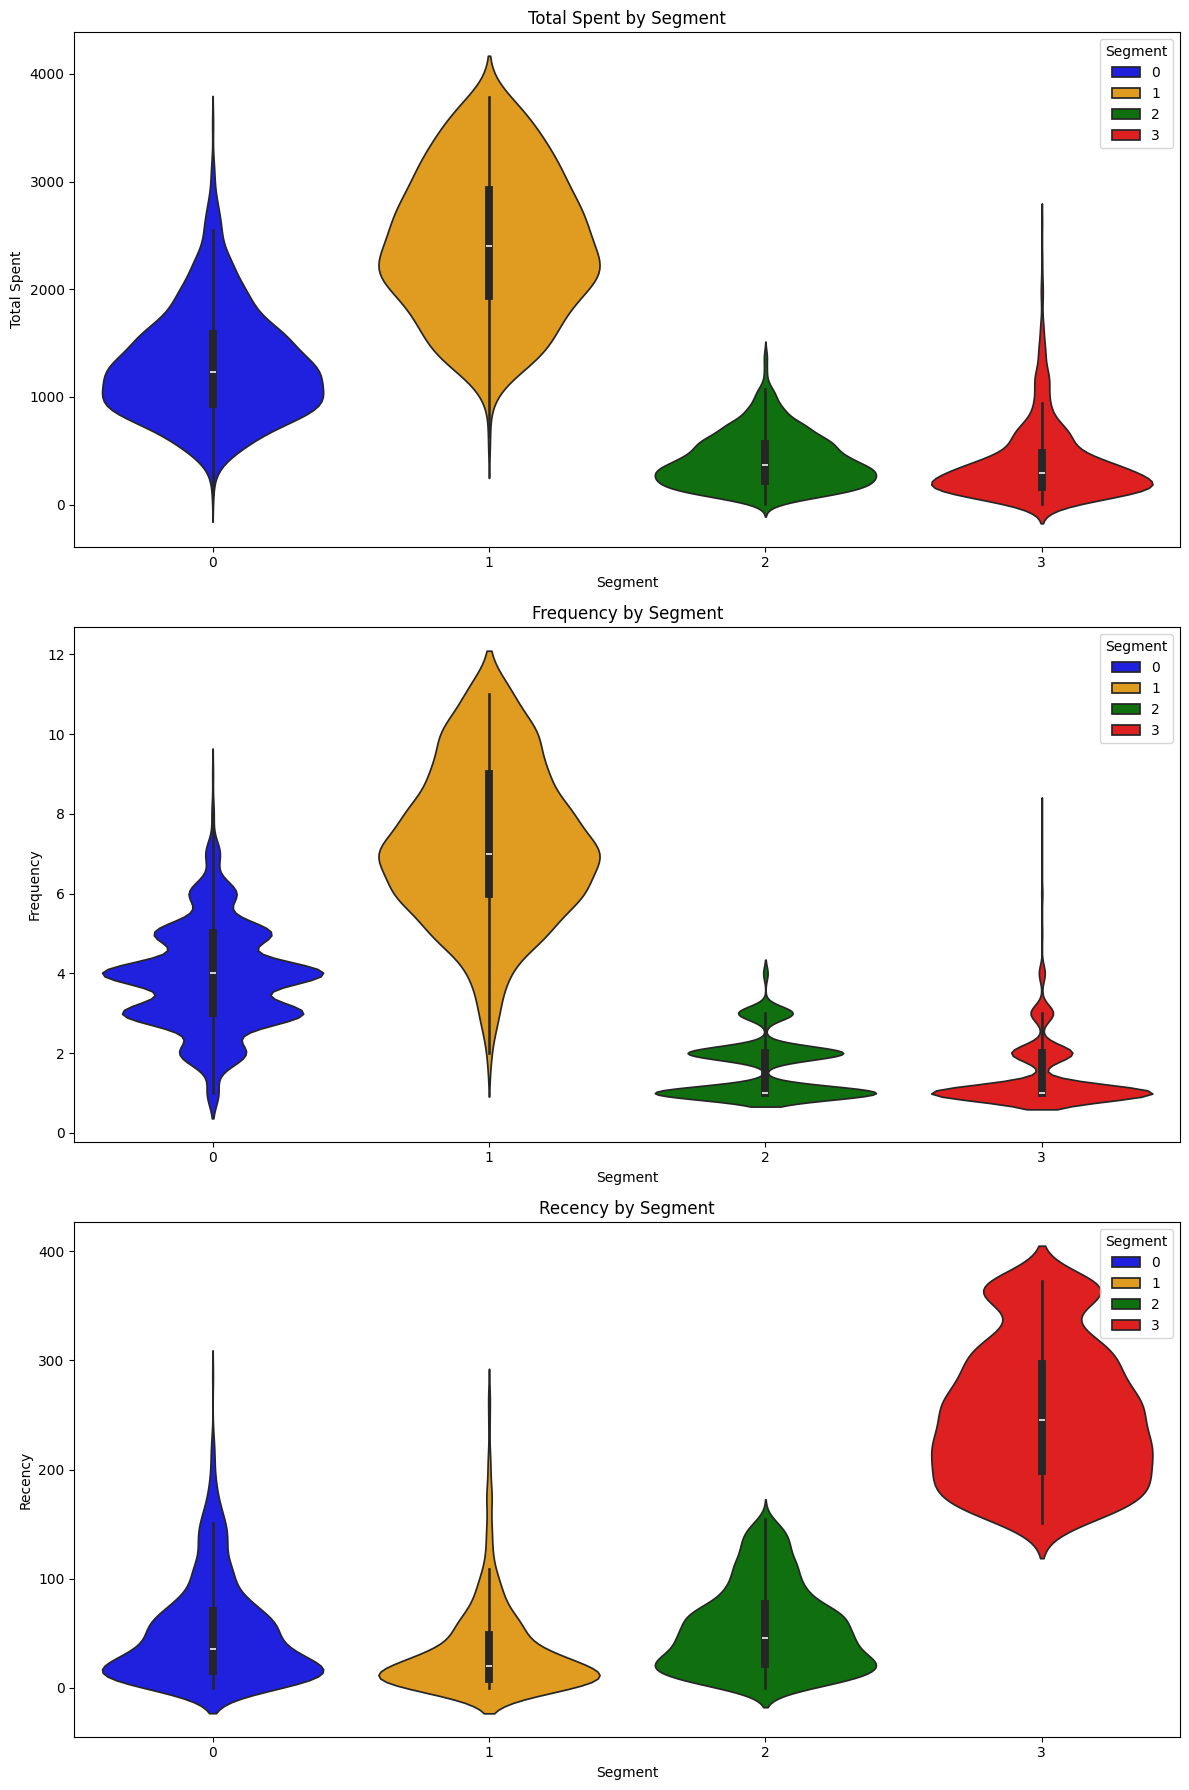

In [251]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x='Segment', y='TotalSpent', data=customer_metrics, palette=cluster_colors, hue='Segment')
plt.title('Total Spent by Segment')
plt.ylabel('Total Spent')

plt.subplot(3, 1, 2)
sns.violinplot(x='Segment', y='Frequency', data=customer_metrics, palette=cluster_colors, hue='Segment')
plt.title('Frequency by Segment')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x='Segment', y='Recency', data=customer_metrics, palette=cluster_colors, hue='Segment')
plt.title('Recency by Segment')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

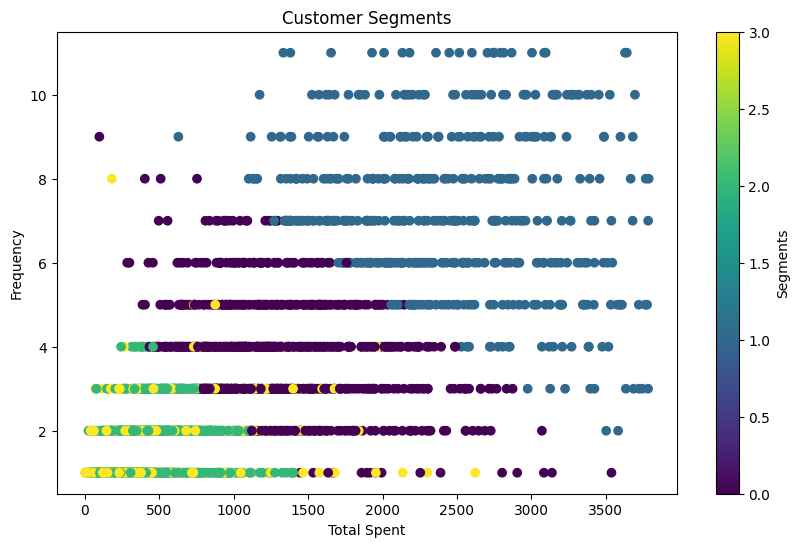

In [252]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_metrics['TotalSpent'],
                      customer_metrics['Frequency'],
                      c=customer_metrics['Segment']
                      )
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Customer Segments')
plt.colorbar(label='Segments')

plt.show()

In [253]:
segment_analysis = customer_metrics.groupby('Segment').agg(
  AvgTotalSpent= ('TotalSpent','mean'),
  TotalSpentCount= ('TotalSpent', 'count'),
  AvgPurchaseFrequency= ('Frequency', 'mean'),
  AvgCustomerLifespan= ('CustomerLifespan', 'mean')
).round(2)
segment_analysis.reset_index(inplace=True)
segment_analysis

,Segment,AvgTotalSpent,TotalSpentCount,AvgPurchaseFrequency,AvgCustomerLifespan
0,0,1303.17,921,3.88,197.00
1,1,2426.36,499,7.24,268.12
2,2,413.62,1487,1.64,67.53
3,3,384.54,902,1.43,23.08


### Adding Segment Labels

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [255]:
def label_segments(row):
  if row['Segment'] == 0:
    return "Retain"
  elif row["Segment"] == 1:
    return "Re-Engage"
  elif row["Segment"] == 2:
    return "Nurture"
  else:
    return "Reward"

customer_metrics['SegmentLabel'] = customer_metrics.apply(label_segments, axis=1)
customer_metrics

,Customer ID,TotalSpent,Frequency,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,Segment,SegmentLabel
0,12346.0,169.36,2,2010-03-02 13:08:00,2010-06-28 13:53:00,118,164,3,Reward
1,12347.0,1323.32,2,2010-10-31 14:20:00,2010-12-07 14:57:00,37,2,0,Retain
2,12348.0,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,1,73,2,Nurture
3,12349.0,2221.14,2,2010-04-29 13:20:00,2010-10-28 08:23:00,181,42,0,Retain
4,12351.0,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,1,10,2,Nurture
...,...,...,...,...,...,...,...,...,...
3804,18283.0,641.77,6,2010-02-19 17:16:00,2010-11-22 15:30:00,275,17,0,Retain
3805,18284.0,411.68,1,2010-10-04 11:33:00,2010-10-04 11:33:00,1,66,2,Nurture
3806,18285.0,377.00,1,2010-02-17 10:24:00,2010-02-17 10:24:00,1,295,3,Reward
3807,18286.0,1246.43,2,2009-12-16 10:45:00,2010-08-20 11:57:00,247,111,0,Retain


### Exporting Data

In [256]:
segment_analysis.to_csv('../data/processed/segments.csv', index=False)
customer_metrics.to_csv('../data/processed/customers_with_segment_labels.csv', index=False)